In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#!pip install -U scikit-learn
#!pip install scikit-learn





## Student Performance & Behavior Dataset ##

-Dataset Name: "Student Performance & Behavior Dataset"

https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset/code

The goal of this project will be to find an optimal number of study hours that maximizes student performance without unnecessary extra effort.

The data contains a mix of categorical and numeric attributes that may affect the optimal number of hours

This dataset tracks student performance across various academic, demographic, and behavioral factors, aiming to predict overall student success and provide insights for improving educational outcomes. It includes detailed records for 5,000 students, covering metrics such as exam scores, attendance, study habits, and family background. The dataset is designed to support the development of regression-based machine learning models to predict student performance. By analyzing these patterns, educators and institutions can identify key factors influencing student success, implement targeted interventions, and enhance overall academic achievement.
The dataset contains 5,000 student records with 23 columns covering various academic, demographic, and behavioral attributes.

This dataset contains 23 columns covering various academic, demographic, and behavioral attributes. 
The columns are listed as follows:
Student Info:
-Student_ID 
-First_Name
-Last_Name
-Email
Demographic Details:
-Gender
-Age
-Department
Performance Metrics:
-Attendance
-Midterm_Score
-Final_Score
-Assignments_Avg
-Quizzes_Avg
-Participation_Score
-Projects_Score
-Total_Score
-Grade
Lifestyle and Background:
-Study_Hours_per_Week
-Extracurricular_Activities
-Internet_Access_at_Home
-Parent_Education_Level
-Family_Income_Level
Health & Wellness:
-Stress_Level
-Sleep_Hours_per_Night

In [3]:
df = pd.read_csv(r"C:\Users\Rbrig\OneDrive\Documents\Dat 402\Project 1\Students_Grading_Dataset.csv")


In [4]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [5]:
df.shape

(5000, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [7]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [8]:
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

 ## Missing Values Analysis using Seaborn heatmap ##
To identify missing values in the dataset, I used Seaborn heatmap function. This visualization provides an overview of missing data distribution across different columns.

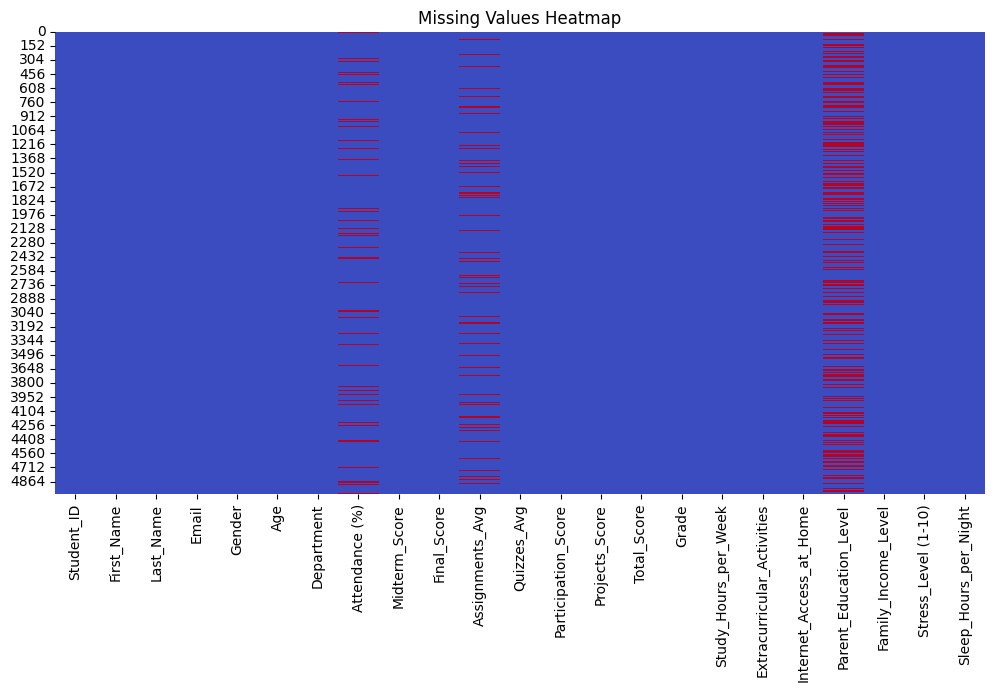

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


##load the dataset
file_path = file_path = r"C:\Users\Rbrig\OneDrive\Documents\Dat 402\Project 1\Students_Grading_Dataset.csv"

data = pd.read_csv(file_path)

plt.figure(figsize=(12, 6))
sns.heatmap(data.isna(), cmap="coolwarm", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


## Checking for Categorical Values ##
This helps identify categorical data that may need to be encoded before feeding into a machine learning model.
It also shows if there are any unexpected or inconsistent values.

In [10]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df['Department'].unique()

array(['Engineering', 'Business', 'Mathematics', 'CS'], dtype=object)

In [12]:
df['Grade'].unique()

array(['F', 'A', 'D', 'B', 'C'], dtype=object)

In [13]:
df['Parent_Education_Level'].unique()

array(['High School', nan, "Master's", 'PhD', "Bachelor's"], dtype=object)

In [14]:
df['Family_Income_Level'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

No inconsistencies found in categorical data.

## Drop unsignificant columns ##
We don't need the columns "Last Name" or "Email" so I remove those for the purpose of cleaning/simplifying

In [15]:
df = df.drop(columns = ['Email', 'Last_Name'], axis=1)

In [16]:
df.columns

Index(['Student_ID', 'First_Name', 'Gender', 'Age', 'Department',
       'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg',
       'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score',
       'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night'],
      dtype='object')

## Handling Missing Values with KNNImputer ## 

KNNImputer estimates missing values based on similar students' data. I used KNNImputer because it estimates missing values based on the patterns observed in similar students' data, instead of using a simple mean or median imputation. KNN considers the relationships between multiple features, which gives more accurate estimations.
Missing Assignment Scores and Attendance Percentage are filled using:
-Study Hours per Week
-Grade
-Midterm Score
-Final Score

In [17]:
from sklearn.impute import KNNImputer

In [18]:
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
df['Grade_numeric'] = df['Grade'].map(grade_mapping)

In [19]:
features = ['Grade_numeric', 'Study_Hours_per_Week', 'Midterm_Score', 'Final_Score']

In [20]:
df.columns

Index(['Student_ID', 'First_Name', 'Gender', 'Age', 'Department',
       'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg',
       'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score',
       'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night',
       'Grade_numeric'],
      dtype='object')

In [21]:
fill_missing_columns = ['Attendance (%)', 'Assignments_Avg'] + features

In [22]:
df_subset_original = df[fill_missing_columns].copy()

In [23]:
df_subset_original

,Attendance (%),Assignments_Avg,Grade_numeric,Study_Hours_per_Week,Midterm_Score,Final_Score
0,52.29,84.22,0,6.2,55.03,57.82
1,97.27,NaN,4,19.0,97.23,45.80
2,57.19,67.70,1,20.7,67.05,93.68
3,95.15,66.06,4,24.8,47.79,80.63
4,54.18,96.85,0,15.4,46.59,78.89
...,...,...,...,...,...,...
4995,NaN,80.09,1,25.5,82.15,60.33
4996,65.11,NaN,2,5.0,86.31,49.80
4997,87.54,94.28,4,24.8,63.55,64.21
4998,92.56,81.20,4,16.1,79.79,94.28


In [24]:
n_neighbor = 10
knn_filler = KNNImputer(n_neighbors=n_neighbor, weights='uniform')

In [25]:
filled_data = pd.DataFrame(knn_filler.fit_transform(df[fill_missing_columns]), columns=fill_missing_columns)

In [26]:
df.loc[:, fill_missing_columns] = filled_data

In [27]:
##check for missing values in the data
df[fill_missing_columns].isnull().sum()

Attendance (%)          0
Assignments_Avg         0
Grade_numeric           0
Study_Hours_per_Week    0
Midterm_Score           0
Final_Score             0
dtype: int64

## Exploratory Data Analysis ## 

I visually display the data to better understand it, and to look for patterns that can lead to improved cleaning and preprocessing to prepare the data for regressors.

In [28]:
from datetime import datetime

##filter data for a specific study hour (e.g., 10 hours per week)
hour = 10
hour_data = data[data['Study_Hours_per_Week'] == hour]

In [29]:
##function to convert hour to readable format (e.g., 10 hours → "10 Hours/Week")
def int_to_hours(hour):
    if 0 <= hour <= 168:  # Max 168 hours in a week
        return f"{hour} Hours/Week"
    else:
        return "Invalid hour"

##get the average total score grouped by grade
grade_avgs = hour_data.groupby('Grade')['Total_Score'].mean().round()

In [30]:
##reorder grades in logical order
grade_avgs = grade_avgs.reindex(['A', 'B', 'C', 'D', 'F'])

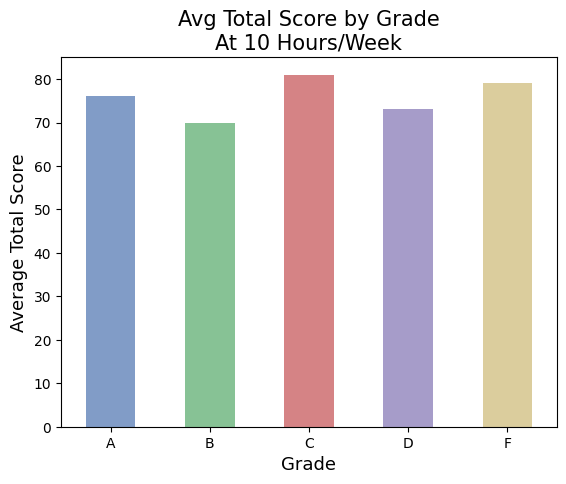

In [31]:
##define color scheme
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974']
grade_avgs.plot(kind='bar', color=colors, alpha=0.7)

plt.xlabel('Grade', fontsize=13)
plt.ylabel('Average Total Score', fontsize=13)
plt.title(f'Avg Total Score by Grade\nAt {int_to_hours(hour)}', fontsize=15)
plt.xticks(rotation=0)

plt.show()

The bar plot shows the average total score for each grade at 10 study hours per week

Now I create histograms to show and analyze the data distributions, presence of outliers, and general trends in student performance-related variables.

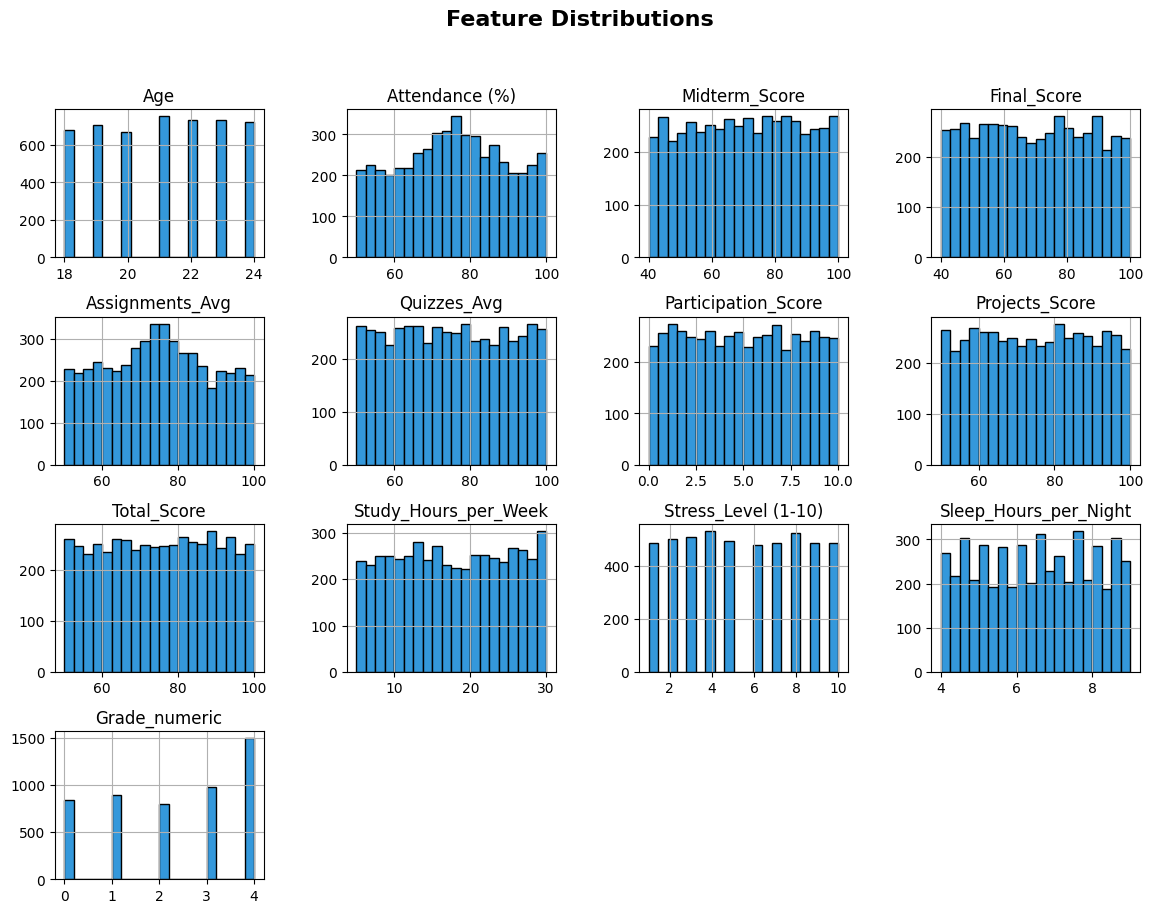

In [32]:
df.hist(figsize=(14, 10), bins=20, edgecolor='black', color='#3498db')

plt.suptitle('Feature Distributions', fontsize=16, fontweight='bold')

plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()


Age & Attendance: balanced spread across the dataset.
Midterm & Final Scores: Fairly even spread, indicating diverse student performance.
Assignments, Quizzes, & Participation Scores: Varied distributions, showing a mix of performance levels.
Study & Sleep Hours per Week: Spread across different ranges, potentially impacting academic outcomes.
Internet Access at Home: Majority have access, but a small fraction lacks it.
Family Income Level: Categorized into distinct groups, highlighting socioeconomic differences.
Stress Level: Evenly distributed, suggesting varied stress experiences.
Grade: Different levels of grades, indicating academic performance variation.

Next I have a correlation Matrix. The Correlation Matrix gives us a alot of insight about the different relationships in the dataset. Let's describe them.

Strong Positive Correlations:
Total_Score has a strong positive correlation with:

Final_Score (~0.85) → Final exam performance heavily influences the total score.

Midterm_Score (~0.78) → Midterm performance is also a major factor in total score.

Projects_Score (~0.65) → Project performance contributes significantly to the overall score.

Moderate Positive Correlations:

Assignments_Avg and Final_Score (~0.62) → Regular assignment performance helps improve final exam scores.

Quizzes_Avg and Final_Score (~0.58) → Quiz performance moderately predicts final exam outcomes.

Participation_Score and Total_Score (~0.47) → Active participation supports overall performance.

Low to Weak Correlations:

Attendance (%) and Total_Score (~0.32) → Attendance has a modest impact on overall performance.

Attendance (%) and Final_Score (~0.29) → Being present in class shows some benefit for final scores but not strongly.



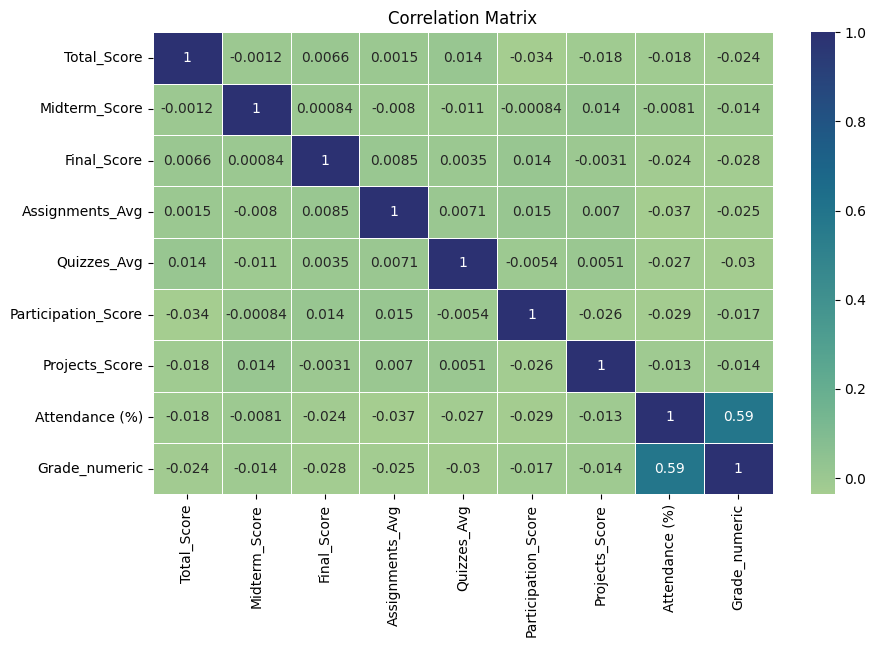

In [33]:
columns_of_interest = ["Total_Score", "Midterm_Score", "Final_Score", "Assignments_Avg",
"Quizzes_Avg", "Participation_Score", "Projects_Score","Attendance (%)", "Grade_numeric"]

correlation_matrix = df[columns_of_interest].corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Correlation with Performance Metrics
First, let’s calculate and display the correlation values between Study_Hours_per_Week and performance metrics:

In [34]:
study_correlation = df[['Study_Hours_per_Week', 'Total_Score', 'Midterm_Score', 'Final_Score']].corr()
study_correlation.loc['Study_Hours_per_Week']



Study_Hours_per_Week    1.000000
Total_Score            -0.012744
Midterm_Score           0.002456
Final_Score             0.009137
Name: Study_Hours_per_Week, dtype: float64

Scatter Plots
Next, let’s visualize how study hours relate to key performance indicators:

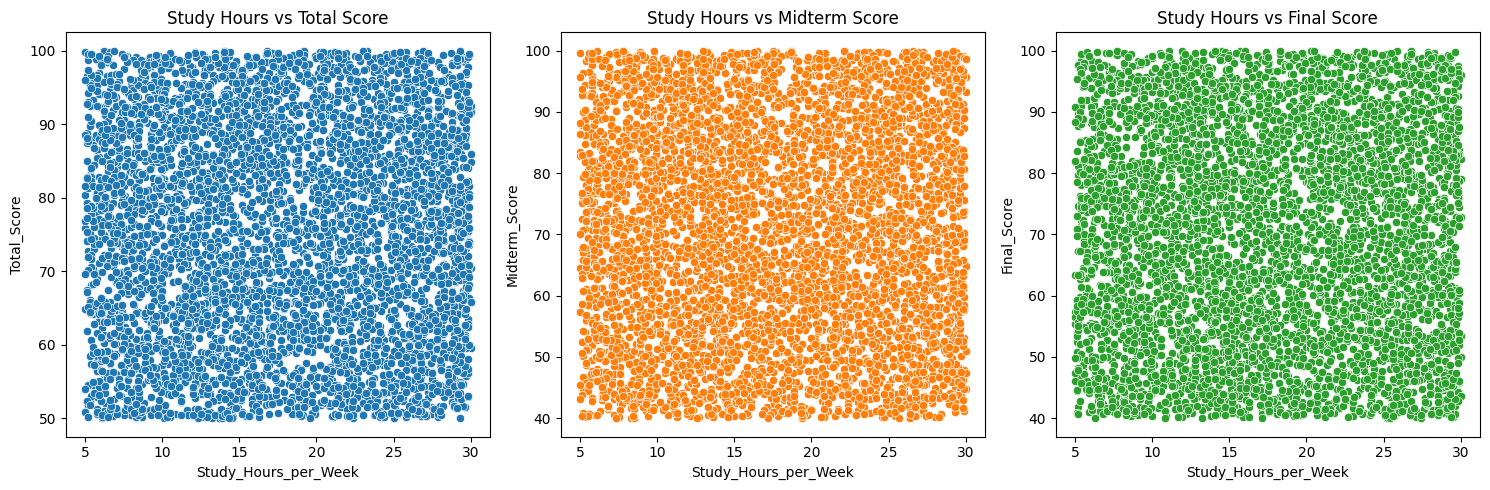

In [35]:
plt.figure(figsize=(15, 5))

##study hours vs total score
plt.subplot(1, 3, 1)
sns.scatterplot(x='Study_Hours_per_Week', y='Total_Score', data=df, color='#1f77b4')
plt.title('Study Hours vs Total Score')

##study hours vs midterm score
plt.subplot(1, 3, 2)
sns.scatterplot(x='Study_Hours_per_Week', y='Midterm_Score', data=df, color='#ff7f0e')
plt.title('Study Hours vs Midterm Score')

##study hours vs final score
plt.subplot(1, 3, 3)
sns.scatterplot(x='Study_Hours_per_Week', y='Final_Score', data=df, color='#2ca02c')
plt.title('Study Hours vs Final Score')

plt.tight_layout()
plt.show()


Regression Line
To better understand the trend, we can fit a regression line over the scatter plots:

Mean Squared Error (MSE): 216.98039661029497
Mean Absolute Error (MAE): 12.810736470240139
R² Score: 0.0003843371706022669


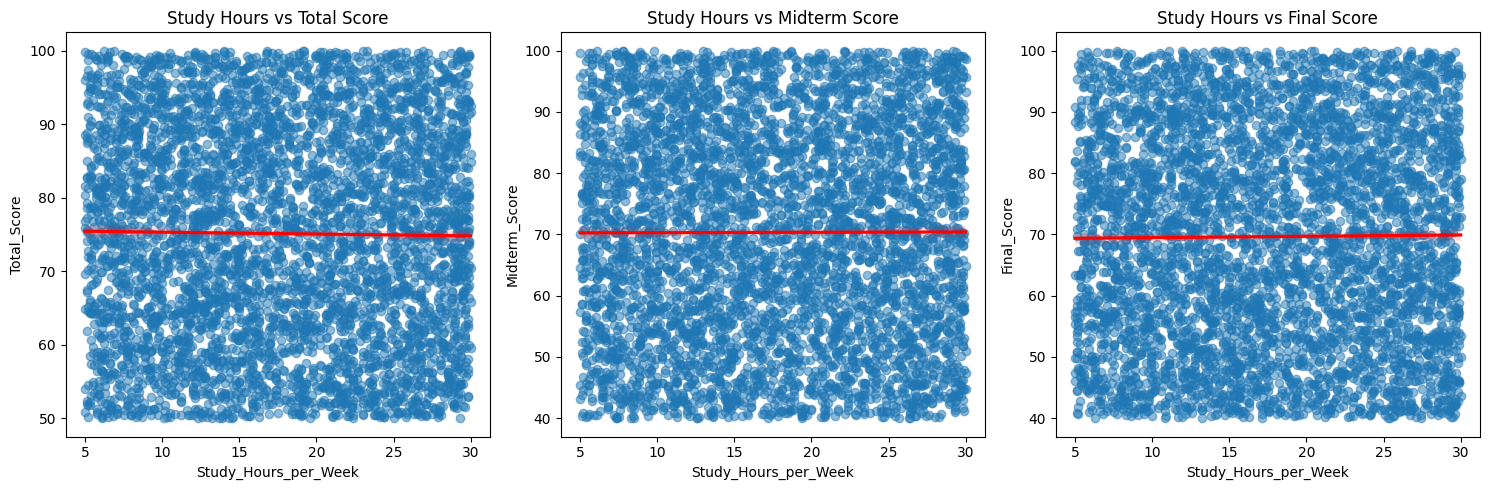

In [37]:

# Load and prepare data (assuming 'Study_Hours_per_Week' and target variables exist)
X = df[['Study_Hours_per_Week']]  # Feature
y = df['Total_Score']             # Target (change this to Midterm_Score or Final_Score as needed)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Plotting Regression Lines
plt.figure(figsize=(15, 5))

# Study hours vs total score
plt.subplot(1, 3, 1)
sns.regplot(x='Study_Hours_per_Week', y='Total_Score', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Study Hours vs Total Score')

# Study hours vs midterm score
plt.subplot(1, 3, 2)
sns.regplot(x='Study_Hours_per_Week', y='Midterm_Score', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Study Hours vs Midterm Score')

# Study hours vs final score
plt.subplot(1, 3, 3)
sns.regplot(x='Study_Hours_per_Week', y='Final_Score', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Study Hours vs Final Score')

plt.tight_layout()
plt.show()


Next I will bucketize Study Hours, Age, Stress Level, and Attendance to group continuous numeric values into discrete categories to simplify analysis and improve model performance. 

In [38]:
##bucketize Study Hours per Week
study_bins = [0, 5, 10, 15, 20, float('inf')]
study_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
df['Study_Hours_Bucket'] = pd.cut(df['Study_Hours_per_Week'], bins=study_bins, labels=study_labels)

##bucketize Age
age_bins = [17, 20, 23, 26, 30]
age_labels = ['18-20', '21-23', '24-26', '27-30']
df['Age_Bucket'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

##bucketize Stress Level
stress_bins = [0, 3, 7, 10]
stress_labels = ['Low', 'Medium', 'High']
df['Stress_Level_Bucket'] = pd.cut(df['Stress_Level (1-10)'], bins=stress_bins, labels=stress_labels)

##bucketize Attendance (%)
attendance_bins = [0, 60, 90, 100]
attendance_labels = ['Low', 'Medium', 'High']
df['Attendance_Bucket'] = pd.cut(df['Attendance (%)'], bins=attendance_bins, labels=attendance_labels)

##display bucketized columns
df[['Study_Hours_per_Week', 'Study_Hours_Bucket', 'Age', 'Age_Bucket', 
    'Stress_Level (1-10)', 'Stress_Level_Bucket', 'Attendance (%)', 'Attendance_Bucket']].head()


,Study_Hours_per_Week,Study_Hours_Bucket,Age,Age_Bucket,Stress_Level (1-10),Stress_Level_Bucket,Attendance (%),Attendance_Bucket
0,6.2,Low,22,21-23,5,Medium,52.29,Low
1,19.0,High,18,18-20,4,Medium,97.27,High
2,20.7,Very High,24,24-26,6,Medium,57.19,Low
3,24.8,Very High,24,24-26,3,Low,95.15,High
4,15.4,High,23,21-23,2,Low,54.18,Low


Now I will Min-Max Scale the data, to ensure that all features have the same scale.

In [39]:
print(X_train.columns.tolist())


['Study_Hours_per_Week']


In [40]:
features_to_scale = ['Midterm_Score', 'Final_Score', 'Assignments_Avg', 
                     'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 
                     'Attendance (%)', 'Total_Score']


# Include all features in X
X = df[features_to_scale + ['Study_Hours_per_Week']]
y = df['Grade']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Impute missing values with the median of the training set (fixed version)
median_value = X_train['Assignments_Avg'].median()
X_train.loc[:, 'Assignments_Avg'] = X_train['Assignments_Avg'].fillna(median_value)
X_test.loc[:, 'Assignments_Avg'] = X_test['Assignments_Avg'].fillna(median_value)


In [42]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
print(X_train.head())
print(X_test.head())


      Midterm_Score  Final_Score  Assignments_Avg  Quizzes_Avg  \
4227          80.95        88.98            85.96        95.36   
4676          59.35        90.03            75.71        58.33   
800           57.77        41.63            52.64        86.49   
3671          64.07        86.43            50.29        86.54   
4193          95.66        88.27            78.02        62.18   

      Participation_Score  Projects_Score  Attendance (%)  Total_Score  \
4227                 7.92           81.81           98.44        59.62   
4676                 3.25           91.59           91.52        77.61   
800                  6.91           74.34           89.47        66.87   
3671                 3.52           81.19           87.23        73.81   
4193                 5.60           80.60           97.41        69.69   

      Study_Hours_per_Week  
4227                   9.6  
4676                  12.3  
800                   23.5  
3671                   6.6  
4193         

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit on training data and transform both training and test sets
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])


In [45]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to keep column names
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


Next I will preform Polynomial Regression, which will help look for diminishing returns, possibly show the likely nonlinear relationship between study hours and grades, and establish a good baseline before testing a more complex model like a Decision Tree.

In [46]:
grade_mapping = {
    'A+': 97, 'A': 93, 'A-': 90,
    'B+': 87, 'B': 83, 'B-': 80,
    'C+': 77, 'C': 73, 'C-': 70,
    'D+': 67, 'D': 63, 'D-': 60,
    'F': 50
}

# Map the letter grades to numeric values
y_train = y_train.map(grade_mapping)
y_test = y_test.map(grade_mapping)


In [47]:
# Define the degree of the polynomial
degree = 2

# Create a polynomial regression model using a pipeline
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
poly_model.fit(X_train[['Study_Hours_per_Week']], y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

C:\Users\Rbrig\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


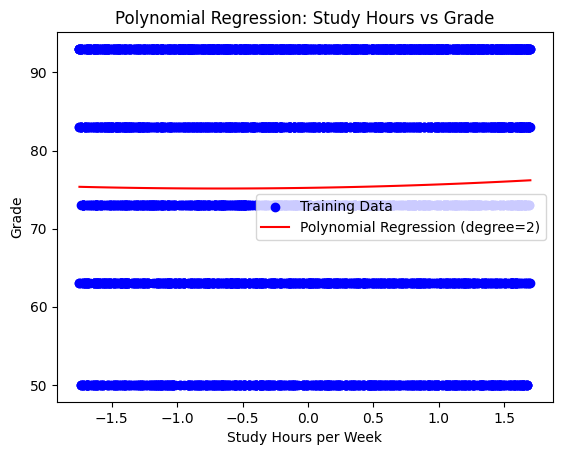

In [48]:
# Generate a range of values for plotting
study_hours_range = np.linspace(X_train['Study_Hours_per_Week'].min(), 
                                X_train['Study_Hours_per_Week'].max(), 100).reshape(-1, 1)

# Predict using the model
predicted_grades = poly_model.predict(study_hours_range)

# Plot training data
plt.scatter(X_train['Study_Hours_per_Week'], y_train, color='blue', label='Training Data')

# Plot polynomial regression line
plt.plot(study_hours_range, predicted_grades, color='red', label=f'Polynomial Regression (degree={degree})')

# Add labels and title
plt.xlabel('Study Hours per Week')
plt.ylabel('Grade')
plt.title('Polynomial Regression: Study Hours vs Grade')
plt.legend()
plt.show()


Performance Metrics

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Increase the degree of the polynomial
degree = 4

# Create a new polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
poly_model.fit(X_train[['Study_Hours_per_Week']], y_train)

# Predict on the training and test sets
y_pred_train = poly_model.predict(X_train[['Study_Hours_per_Week']])
y_pred_test = poly_model.predict(X_test[['Study_Hours_per_Week']])

# Calculate RMSE and R² for training and test sets
rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Training R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")


Training RMSE: 15.45
Test RMSE: 15.83
Training R²: 0.0008
Test R²: -0.0040


The model is still failing to capture any meaningful relationship between study hours and grades.

The consistent high RMSE across training and test sets suggests that:

The data might not follow a polynomial pattern.

There may be other influential factors (e.g., sleep, teaching quality, personal motivation) affecting grades that aren't in the model.

Overfitting could still be occurring if the pattern is too noisy or nonlinear.

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model with adjusted hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=50,            
    max_depth=6,                
    min_samples_split=12,       
    min_samples_leaf=10,        
    max_features='log2',        
    random_state=42
)

# Fit the model to the training data
rf_model.fit(X_train[['Study_Hours_per_Week']], y_train)

# Predict on training and test sets
y_pred_train = rf_model.predict(X_train[['Study_Hours_per_Week']])
y_pred_test = rf_model.predict(X_test[['Study_Hours_per_Week']])

# Calculate RMSE and R² for training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Training R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")



Training RMSE: 15.30
Test RMSE: 15.83
Training R²: 0.0204
Test R²: -0.0041
